In [1]:
import numpy as np
import pandas as pd
import tensorflow.keras as tk
import tensorflow.keras.utils as np_utils
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

/home/samhuang/.conda/envs/PyRoot/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

(60000, 28, 28)


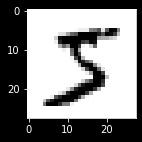

In [3]:
(xtrain, ytrain), (xtest, ytest) = tk.datasets.mnist.load_data()
print (xtrain.shape)
plot_image(xtrain[0])

In [4]:
X, val_X, Y, val_Y = train_test_split(xtrain.reshape(xtrain.shape[0], xtrain.shape[1]*xtrain.shape[2]), ytrain, test_size = 0.3, random_state=1)
print (X.shape, val_X.shape, Y.shape, val_Y.shape)
#xgb矩陣賦值
xgb_val = xgb.DMatrix(val_X,label=val_Y)
xgb_train = xgb.DMatrix(X, label=Y)
xgb_test = xgb.DMatrix(xtest.reshape(xtest.shape[0], xtest.shape[1]*xtest.shape[2]), ytest)

(42000, 784) (18000, 784) (42000,) (18000,)


In [5]:
params = {
    'max_depth': 5,                 # the maximum depth of each tree
    'eta': 0.5,                     # the training step for each iteration
    'eta_decay': 0.9,
    'min_eta': 0.05,
    'silent': 0,                    # logging mode - quiet
    'objective': 'multi:softmax',   # multiclass classification using the softmax objective
    'num_class': 10,                 # the number of classes that exist in this datset
    'early_stopping_rounds': 10,
    'n_estimators': 1000
}  


plst = list(params.items())
num_rounds = 5000 # 迭代次數
watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]

#訓練模型並儲存
# early_stopping_rounds 當設定的迭代次數較大時，early_stopping_rounds 可在一定的迭代次數內準確率沒有提升就停止訓練
model = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=100)
#model.save_model('./model/xgb.model') # 用於儲存訓練出的模型
print ("best best_ntree_limit",model.best_ntree_limit)

[15:01:17] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "eta_decay", "min_eta", "n_estimators", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:01:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.04940	val-mlogloss:1.09166
[1]	train-mlogloss:0.74538	val-mlogloss:0.80018
[2]	train-mlogloss:0.56883	val-mlogloss:0.63024
[3]	train-mlogloss:0.44344	val-mlogloss:0.50939
[4]	train-mlogloss:0.35702	val-mlogloss:0.42717
[5]	train-mlogloss:0.29637	val-mlogloss:0.37050
[6]	train-mlogloss:0.24909	val-mloglos

In [10]:
preds = model.predict(xgb_test)
print(preds.shape)
print (preds[:2])
ypred=model.predict(xgb_test)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(10000,)
[7. 2.]
Accuracy: 97.63%


In [13]:
confusion = confusion_matrix(ytest, ypred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 968    0    1    0    0    2    4    1    4    0]
 [   0 1126    3    1    0    1    2    1    1    0]
 [   3    0 1004    6    3    0    2    8    5    1]
 [   0    0    5  990    0    4    0    4    4    3]
 [   1    0    3    1  955    0    3    0    2   17]
 [   2    0    2    7    0  866    6    2    4    3]
 [   6    2    0    1    4    4  936    0    5    0]
 [   1    2   12    2    2    0    0  999    2    8]
 [   4    0    4    2    2    2    4    3  946    7]
 [   6    5    1    5    8    1    1    6    3  973]]


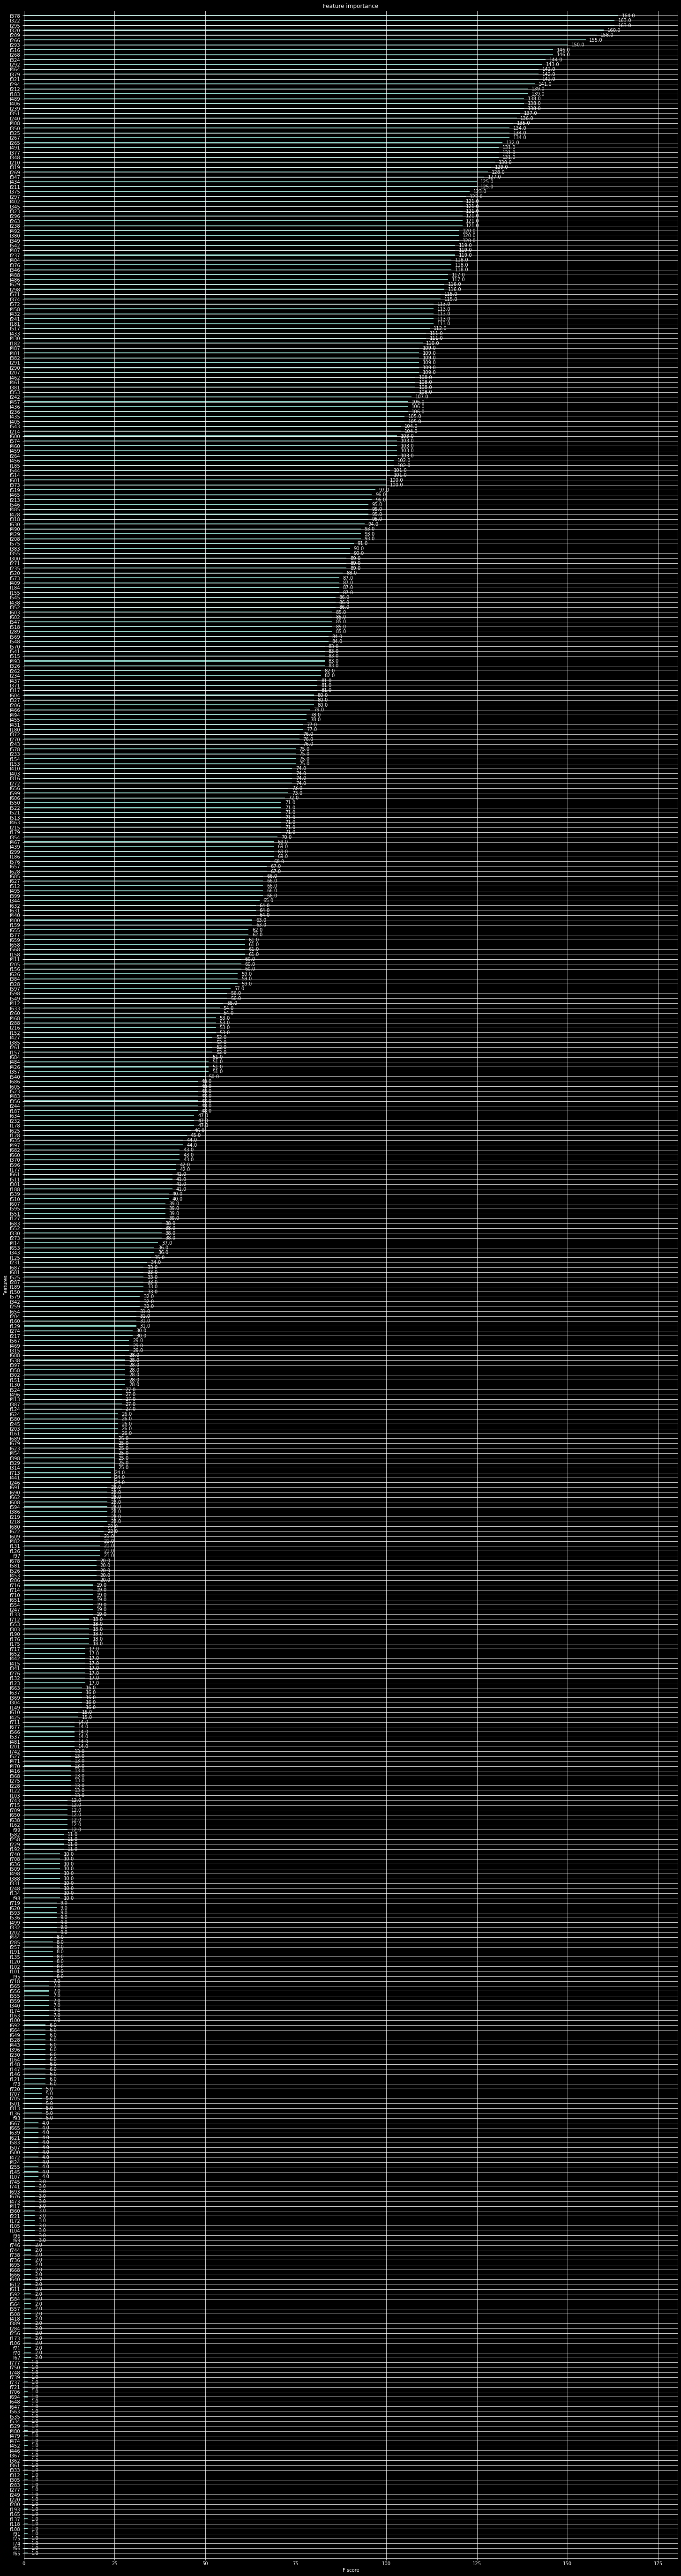

In [19]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [25, 50]
plt.show()